# Churn Data preprocessing 

In [1]:
#Importing lbraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from pandas.core.common import SettingWithCopyWarning

df=pd.read_csv('churn_clean.csv') #Read CSV File
churn_PCA=df
churn_PCA

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [2]:
#create function to check for missing values in the data

def count_of_null(churn_PCA):
    count=churn_PCA.isnull().sum().sum()
    return count

# print missing value count in the data
count_null = count_of_null(churn_PCA)
print(count_null)

0


In [3]:
#create function to check duplicate values in the data
def check_duplicates(churn_PCA):
    count=churn_PCA.duplicated().sum().sum()
    return count

# print duplicate values in the data
count_duplicates = check_duplicates(churn_PCA)
print(count_duplicates)

0


In [4]:
#create a function to check information about the data
def about_data (churn_PCA):
        about=churn_PCA.info()
        return about
    
#print information about the data
info=about_data (churn_PCA)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
#Remove irrelevant columns

churn_PCA=churn_PCA.drop(columns=['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8','Interaction',
                          'UID', 'City', 'County','TimeZone','CaseOrder','Zip'])
churn_PCA

,Customer_id,State,Lat,Lng,Population,Area,Job,Children,Age,Income,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,K409198,AK,56.25100,-133.37571,38,Urban,Environmental health practitioner,0,68,28561.99,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,S120509,MI,44.32893,-84.24080,10446,Urban,"Programmer, multimedia",1,27,21704.77,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,K191035,OR,45.35589,-123.24657,3735,Urban,Chief Financial Officer,4,50,9609.57,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,D90850,CA,32.96687,-117.24798,13863,Suburban,Solicitor,1,48,18925.23,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,K662701,TX,29.38012,-95.80673,11352,Suburban,Medical illustrator,0,83,40074.19,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M324793,VT,43.43391,-72.78734,640,Rural,Sport and exercise psychologist,3,23,55723.74,...,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601
9996,D861732,TN,36.56907,-87.41694,77168,Rural,Consulting civil engineer,4,48,34129.34,...,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810
9997,I243405,TX,35.52039,-100.44180,406,Rural,IT technical support officer,1,48,45983.43,...,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799
9998,I641617,GA,33.58016,-85.13241,35575,Urban,Water engineer,1,39,16667.58,...,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752


In [6]:
# create function to print unique values in the dataframe

def print_unique_values(churn_PCA):
    for column in churn_PCA.columns:
        unique_values = churn_PCA[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
print_unique_values(churn_PCA)

Column 'Customer_id' has 10000 unique values:
['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Column 'State' has 52 unique values:
['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 'NV']
Column 'Lat' has 8563 unique values:
[56.251   44.32893 45.35589 ... 43.43391 36.56907 34.70783]
Column 'Lng' has 8630 unique values:
[-133.37571  -84.2408  -123.24657 ...  -72.78734  -87.41694  -83.53648]
Column 'Population' has 5933 unique values:
[   38 10446  3735 ...  4261 77168 12230]
Column 'Area' has 3 unique values:
['Urban' 'Suburban' 'Rural']
Column 'Job' has 639 unique values:
['Environmental health practitioner' 'Programmer, multimedia'
 'Chief Financial Officer' 'Solicitor' 'Medical illustrator'
 'Chief Technology Officer' 'Surveyor, hydrographic'
 'Sales promotion a

In [7]:
#Create function to check statistical summary of the dataset
def stat_summary (churn_PCA):
    statistics_sum = churn_PCA.describe()
    return statistics_sum
#print statistical summary of data
summary = stat_summary (churn_PCA)
summary

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [8]:
#create function to find columns with Categorical Values

def categorcal_columns (churn_PCA):
    cat_cols= churn_PCA.select_dtypes(exclude=['int','float']).columns.tolist()
    return cat_cols
#print categorical columns
categorical = categorcal_columns (churn_PCA)
categorical

['Customer_id',
 'State',
 'Area',
 'Job',
 'Marital',
 'Gender',
 'Churn',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [9]:
#create function to find columns with Numerical Values

def numerical_columns (churn_PCA):
    num_cols = churn_PCA.select_dtypes(include=['int','float']).columns.tolist()
    return num_cols
#print numerical columns
numerical = numerical_columns (churn_PCA)
numerical

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [10]:
#Removing extra spaces from the features Using strip()
churn_PCA.columns = churn_PCA.columns.str.strip()

In [11]:
#Finding Outliers using IQR score

#The IQR is the first quartile subtracted from the third quartile; 
#these quartiles can be clearly seen on a box plot on the data.
# calculate IQR score
#where Q3 is the 75th percentile of the data and Q1 is the 25th percentile of the data.
Q1 = churn_PCA.quantile(0.25)
Q3 = churn_PCA.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# IQR of each column

Lat                         6.765080
Lng                        16.994067
Population              12430.000000
Children                    3.000000
Age                        36.000000
Income                  34021.452500
Outage_sec_perweek          3.951271
Email                       4.000000
Contacts                    2.000000
Yearly_equip_failure        1.000000
Tenure                     53.562101
MonthlyCharge              60.755486
Bandwidth_GB_Year        4349.670543
dtype: float64


In [12]:
#remove outlier
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#Once the IQR is calculated, we can use it to identify outliers by defining a threshold range as follows;
#Lower threshold = Q1 - 1.5 * IQR
#Upper threshold = Q3 + 1.5 * IQR
#Any data points that fall outside of this range are considered outliers and removed from the dataset

churn_PCA = churn_PCA[~((churn_PCA < (Q1 - 1.5 * IQR)) |(churn_PCA > (Q3 + 1.5 * IQR))).any(axis=1)]
churn_PCA.shape

(7973, 35)

In [13]:
# Standardize continous varibale

scaler = StandardScaler()

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

churn_PCA[['Income', 'Outage_sec_perweek', 'Yearly_equip_failure','Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']] = scaler.fit_transform(churn_PCA[['Income', 'Outage_sec_perweek', 'Yearly_equip_failure','Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']])

In [14]:
#display new scaled continouse variables
scaled_df = churn_PCA[['Income', 'Outage_sec_perweek', 'Yearly_equip_failure','Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
scaled_df

,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,-0.658989,0.588667,1.079831,-1.264546,1.615177,-1.186609
3,-0.780591,1.706468,-0.639660,-0.663591,-1.230524,-0.563318
4,0.144652,-0.646394,1.079831,-1.245145,-0.534814,-1.428635
5,-0.617190,-0.551260,1.079831,-1.044078,0.278457,-1.077649
6,-1.106858,0.409109,1.079831,-0.808844,0.628982,-0.680944
...,...,...,...,...,...,...
9993,-1.161315,-0.790980,-0.639660,0.950168,-0.243799,0.856259
9994,0.858203,-1.426006,-0.639660,0.575031,-0.707993,0.707940
9995,0.829302,-0.205278,-0.639660,1.264448,-0.302123,1.423519
9997,0.403174,-1.187656,-0.639660,0.480546,-0.070277,0.348459


In [15]:
# Perform PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

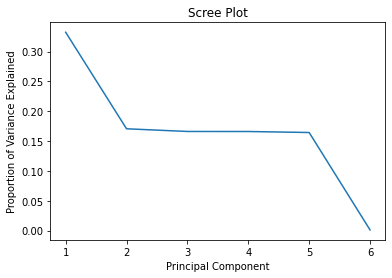

In [16]:
# Scree plot to determine the number of principal components to use
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

#plotted a scree plot to determine the number of principal components to use. 
#use five principal components based on the Kaiser criterion from the Scree plot

In [17]:
# Identify the number of principal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
n_components = len(cumulative_variance[cumulative_variance < 0.95]) + 1
print('Number of Principal Components: ', n_components)

Number of Principal Components:  5


In [18]:
# Fit PCA to the scaled data with the selected number of components i.e 5
pca = PCA(n_components=n_components)
pca.fit(scaled_df)

PCA(n_components=5)

In [19]:
# Get the matrix of principal components
pc_matrix = pca.transform(scaled_df)
print('Matrix of Principal Components:\n', pc_matrix)

Matrix of Principal Components:
 [[-1.6400586   2.03320069  0.18291774  0.10389928  0.83328733]
 [-0.90343175  0.39950577 -0.42455363 -0.58161387 -2.16607522]
 [-1.90324996 -0.26290509  1.28515439 -0.10979356  0.34007724]
 ...
 [ 1.8689254  -0.94404104 -0.34518359  0.55438445 -0.16972052]
 [ 0.55999605 -1.18122061 -0.33188315 -0.05693439  0.71361808]
 [ 1.60813237  1.13349476 -1.1723481  -0.70892146  0.06230012]]


In [20]:
# Identify the variance of each principal component
print('Variance of Each Principal Component:\n', pca.explained_variance_)

Variance of Each Principal Component:
 [1.99385469 1.02313831 0.99613194 0.99572933 0.98566147]


In [21]:
# Identify the total variance captured by the selected principal components
print('Total Variance Captured by Principal Components:', pca.explained_variance_ratio_.sum())

Total Variance Captured by Principal Components: 0.9989606474834921


# Visualization

##This visualization shows the churn data after it has been reduced to Five principal components (PC1 PC2 PC2 PC3 PC4 PC5) using PCA. 
#The scatter plot displays the values of each observation in the PCA dataset along the PC1 PC2 PC2 PC3 PC4 PC5 axes.
#The plot can help to identify any patterns or clusters in the data

In [22]:
# transform the original data using the fitted PCA object
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# display the first few rows of the PCA DataFrame
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5
0 -1.640059  2.033201  0.182918  0.103899  0.833287
1 -0.903432  0.399506 -0.424554 -0.581614 -2.166075
2 -1.903250 -0.262905  1.285154 -0.109794  0.340077
3 -1.472500  0.554676  0.884366 -0.558831  0.779824
4 -0.998869  1.509524  0.560696 -0.628330  0.287589


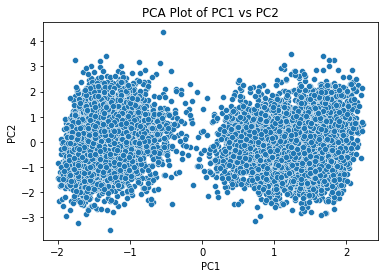

In [23]:
# Select two principal components
PC1 = 1
PC2 = 2

# Create a scatter plot of the PCA dataset
sns.scatterplot(data=pca_df, x=f'PC{PC1}', y=f'PC{PC2}')

# Add plot titles and axis labels
plt.title(f'PCA Plot of PC{PC1} vs PC{PC2}')
plt.xlabel(f'PC{PC1}')
plt.ylabel(f'PC{PC2}')

# Show the plot
plt.show()

#distinct clusters are visible in the scatter plot, this can indicate that the PCA algorithm has successfully captured 
#the underlying structure of the original data

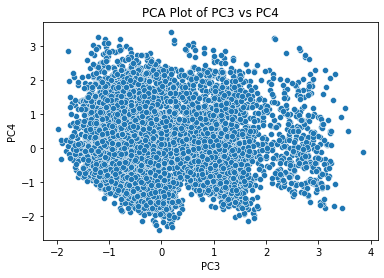

In [24]:
# Select two principal components
PC3 = 3
PC4 = 4

# Create a scatter plot of the PCA dataset
sns.scatterplot(data=pca_df, x=f'PC{PC3}', y=f'PC{PC4}')

# Add plot titles and axis labels
plt.title(f'PCA Plot of PC{PC3} vs PC{PC4}')
plt.xlabel(f'PC{PC3}')
plt.ylabel(f'PC{PC4}')

# Show the plot
plt.show()

#There is no clear separation between the cluster, it may suggest that the PCA algorithm has not been able to capture 
#all of the relevant information in the data

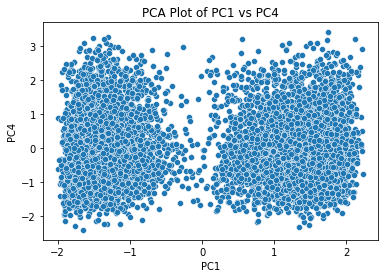

In [25]:
# Select two principal components
PC1 = 1
PC4 = 4

# Create a scatter plot of the PCA dataset
sns.scatterplot(data=pca_df, x=f'PC{PC1}', y=f'PC{PC4}')

# Add plot titles and axis labels
plt.title(f'PCA Plot of PC{PC1} vs PC{PC4}')
plt.xlabel(f'PC{PC1}')
plt.ylabel(f'PC{PC4}')

# Show the plot
plt.show()

#distinct clusters are visible in the scatter plot, this can indicate that the PCA algorithm has successfully captured 
#the underlying structure of the original data

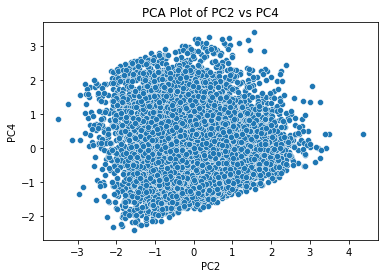

In [26]:
# Select two principal components
PC2 = 2
PC4 = 4

# Create a scatter plot of the PCA dataset
sns.scatterplot(data=pca_df, x=f'PC{PC2}', y=f'PC{PC4}')

# Add plot titles and axis labels
plt.title(f'PCA Plot of PC{PC2} vs PC{PC4}')
plt.xlabel(f'PC{PC2}')
plt.ylabel(f'PC{PC4}')

# Show the plot
plt.show()

#There is no clear separation between the cluster, it may suggest that the PCA algorithm has not been able to capture all
#of the relevant information in the data

In [27]:
# load cleaned churn dataframe into CSV file.
churn_PCA.to_csv('Fixed_churn_PCA.csv', index=False, header=True)